# 케라스 Word2Vec 구현

* 참고: https://wikidocs.net/69141

### 전처리

In [3]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle= True, random_state = 1,
                             remove = ('headers', 'footers',' quotes'))   # 제거할게

documents = dataset.data

print(len(documents))
documents[1]

# 전처리가 많이 필여해

11314


"James Hogan writes:\n\ntimmbake@mcl.ucsb.edu (Bake Timmons) writes:\n>>Jim Hogan quips:\n\n>>... (summary of Jim's stuff)\n\n>>Jim, I'm afraid _you've_ missed the point.\n\n>>>Thus, I think you'll have to admit that  atheists have a lot\n>>more up their sleeve than you might have suspected.\n\n>>Nah.  I will encourage people to learn about atheism to see how little atheists\n>>have up their sleeves.  Whatever I might have suspected is actually quite\n>>meager.  If you want I'll send them your address to learn less about your\n>>faith.\n\n>Faith?\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n>>>Fine, but why do these people shoot themselves in the foot and mock\n>>>the idea of a God?  ....\n\n>>>I hope you understand now.\n\n>>Yes, Jim.  I do understand now.  Thank you for providing some healthy sarcasm\n>>that would have dispelled any sympathies I would have had for

In [4]:
import re 
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text


def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join(w.lower() for w in d.split() if w not in stop_words and len(w) > 3)

def tokenize(d):
    return word_tokenize(d)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
import pandas as pd

news_df = pd.DataFrame({'article' : documents})
len(news_df)

11314

In [6]:
news_df.replace('' , float('NaN'), inplace = True)
news_df.dropna(inplace = True)                       # 불필요한것들 제거

print(len(news_df))
# documents[1]

11311


In [7]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

# print(len(news_df))

0        Well im not sure about the story nad it did se...
1        James Hogan writes\n\ntimmbakemclucsbedu Bake ...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well I will have to change the scoring on my p...
                               ...                        
11309    Danny Rubenstein an Israeli journalist will be...
11310    ronrothrosecom ron roth writes\n\nJB  romdasuc...
11311    In article qntqINNmnfsenatorbedfellowMITEDU cm...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313    In article APRrosieuhedu strprosieuhedu Schwam...
Name: article, Length: 11311, dtype: object

In [8]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

# print(len(news_df))

0        well sure story seem biased what disagree stat...
1        james hogan writes timmbakemclucsbedu bake tim...
2        although realize principle strongest points wo...
3        notwithstanding legitimate fuss proposal much ...
4        well change scoring playoff pool unfortunately...
                               ...                        
11309    danny rubenstein israeli journalist speaking t...
11310    ronrothrosecom roth writes romdasuclinkberkele...
11311    article qntqinnmnfsenatorbedfellowmitedu cmkat...
11312    used deskjet orange micros grappler system upd...
11313    article aprrosieuhedu strprosieuhedu schwam da...
Name: article, Length: 11311, dtype: object

In [9]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()

In [10]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <=1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0) # tokenized_news - drop_news빼기
print(len(news_texts))

# 왜 난 10945가 나오질 않지?

11269


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

news_2000 = news_texts[:2000]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_2000)

idx2word = {value:key for key, value in tokenizer.word_index.items()}   # key value 거꾸로
sequences = tokenizer.texts_to_sequences(news_2000)


In [12]:
vocab_size = len(tokenizer.word_index ) + 1

print(vocab_size)

33938


In [13]:
print(sequences[1])

[530, 10518, 2, 15171, 3862, 8273, 2, 10518, 15172, 1183, 15173, 197, 1259, 847, 1071, 40, 406, 8, 603, 1454, 1219, 5907, 51, 5908, 2608, 4, 848, 1260, 64, 1219, 8274, 499, 51, 5908, 108, 168, 15174, 22, 104, 292, 848, 161, 326, 326, 1220, 480, 4, 71, 108, 407, 78, 1260, 31, 64, 4220, 326, 5909, 382, 1319, 394, 2761, 387, 4, 3119, 2762, 6859, 147, 245, 335, 335, 618, 2354, 3318, 3863, 1, 15175, 15176, 1, 326, 3862, 90, 1406, 3864, 3863, 2912, 27, 10519, 307, 212, 5910, 50, 5173, 5910, 8275, 326, 51, 345, 1865, 226, 2100, 126, 18, 43, 15177, 346, 8276, 399, 54, 15178, 399, 2355, 3865, 326, 31, 13, 4221, 6860, 170, 273, 138, 155, 678, 15179, 307, 10519, 17, 14, 3862, 15180, 460, 3862, 15181, 6, 588, 15182, 15183, 3862, 8273]


### Skipgram

#### Skipgram 전처리

* 네거티브 샘플링(Negative Sampling)

  + Word2Vec은 출력층이 내놓는 값에 소프트맥스 함수를 적용해 확률값으로 변환한 후 이를 정답과 비교해 역전파(backpropagation)
  + 소프트맥스를 적용하려면 분모에 해당하는 값, 즉 중심단어와 나머지 모든 단어의 내적을 한 뒤, 이를 다시 exp 계산을 하는데 전체 단어가 많을 경우 엄청난 계산량 발생
  + 네거티브 샘플링은 소프트맥스 확률을 구할 때 전체 단어를 대상으로 구하지 않고, 일부 단어만 뽑아서 계산을 하는 방식
  + 네거티브 샘플링 동작은 사용자가 지정한 윈도우 사이즈 내에 등장하지 않는 단어(negative sample)를 5~20개 정도 뽑고, 이를 정답단어와 합쳐 전체 단어처럼 소프트맥스 확률을 계산하여 파라미터 업데이트

In [15]:
# 정답인것과 등징하지않는 것들을 softmaxf로 하고 parameter로 한다
# 정확도는 떨어지도라도

from tensorflow.keras.preprocessing.sequence import skipgrams

skip_grams = [skipgrams(sample, vocabulary_size = vocab_size, window_size = 10) for sample in sequences[:10]]# 얼만큼 범위를 고려할거냐

In [21]:
# 10개에 대해 어떤 구성으로 되어 ㅇ있는지
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print('{:s}({:d}), {:s}({:d}) -> {:d}'.format(      # 문자열,index,/ 문자열 ,index/ label결과
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]  ))

       

seem(167), degree(1318) -> 1
races(10517), look(73) -> 1
statement(471), lmcdapilmcericssonse(16623) -> 0
away(159), loaded(2691) -> 0
think(8), shame(3566) -> 1


In [22]:
print(len(skip_grams))
print(len(pairs))
print(len(labels))

10
2420
2420


In [23]:
skip_grams = [skipgrams(seq, vocabulary_size = vocab_size, window_size = 10) for seq in sequences]

# 이번엔 전체를 가져와서해볼게
# 대충해도 3만개 되니까


#### Skipgram 모델 구성

In [24]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [25]:
embed_size = 50 # 우리가 50까지 임의지정해주자


In [33]:
def word2vec():
    target_inputs = Input(shape = (1,), dtype = 'int32')
    target_embedding = Embedding(vocab_size, embed_size)(target_inputs)

    context_inputs = Input(shape = (1,), dtype = 'int32')           # 이건 주변 단어들
    context_embedding = Embedding(vocab_size, embed_size)(context_inputs)
    
    dot_product = Dot(axes = 2)([target_embedding, context_embedding])  # 위에 2개를 dot으로 묶어줘야지
    dot_product = Reshape((1, ), input_shape = (1,1))(dot_product)
    output = Activation('sigmoid')(dot_product)

    model = Model(inputs = [target_inputs, context_inputs], outputs = output)  # 모델의 입츌력을 정해주고
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

    return model


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 1, 50)        1696900     input_8[0][0]                    
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 1, 50)        1696900     input_9[0][0]                    
_______________________________________________________________________________________

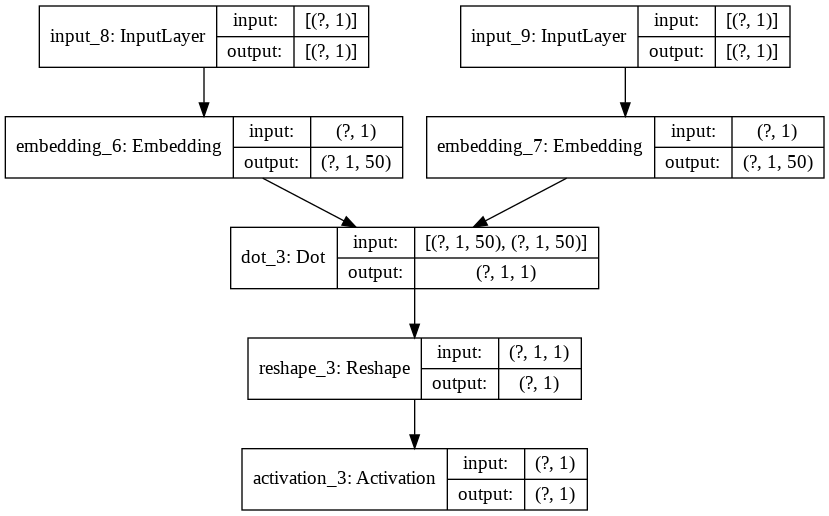

In [35]:
model =word2vec()
model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

# input 2개 받은 embedding 을 dot으로 겹쳐준거지


In [36]:
for epoch in range(1, 11):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype = 'int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype = 'int32')
        labels = np.array(elem[1],dtype = 'int32')

        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)   # 한번에 epoch에 여러번 train을 돌리는거고

    print('epoch:', epoch, 'loss:', loss)

epoch: 1 loss: 1185.8401306271553
epoch: 2 loss: 897.0739857852459
epoch: 3 loss: 817.4665293246508
epoch: 4 loss: 781.2717369645834
epoch: 5 loss: 760.472214333713
epoch: 6 loss: 744.6144214943051
epoch: 7 loss: 728.4081732854247
epoch: 8 loss: 708.7866233065724
epoch: 9 loss: 684.2045917473733
epoch: 10 loss: 654.1447689477354


In [40]:
import gensim

f = open('skipgram.txt', 'w')
f.write('{} {}\n'.format(vocab_size -1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i,:])))))

f.close()

skipgram = gensim.models.KeyedVectors.load_word2vec_format('skipgram.txt', binary = False)


In [41]:
skipgram.most_similar(positive = ['soldiers'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('killed', 0.8188700675964355),
 ('patrol', 0.7623907327651978),
 ('injured', 0.7529659867286682),
 ('occupied', 0.7507748007774353),
 ('country', 0.7502917647361755),
 ('israelis', 0.7453922629356384),
 ('terror', 0.7442940473556519),
 ('flee', 0.7348445653915405),
 ('saddam', 0.7347208857536316),
 ('israeli', 0.7342095971107483)]

In [42]:
skipgram.most_similar(positive = ['world'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('gets', 0.6619343757629395),
 ('prior', 0.6445114612579346),
 ('swiss', 0.5846165418624878),
 ('antisemetic', 0.5806127786636353),
 ('justify', 0.5729603171348572),
 ('inheritance', 0.5699233412742615),
 ('importantly', 0.5689488649368286),
 ('judgement', 0.5685762763023376),
 ('scored', 0.5631540417671204),
 ('heresey', 0.5627567172050476)]

### CBOW


#### CBOW 전처리

In [43]:
def skipgram2cbow(skipgrams):   # skipgrams만든걸 cbow로 만들어서 사용해볼게
    cbows = []
    flag = 0    #flag로 구분
    for n in skipgrams:
        temp1 = []
        for t in n: 
            if flag == 1:
                flag = 0
                temp1.append(t)
            else:
                flag = 1
                temp2 = []
                for x in t:
                    temp2.append([x[1], x[0]])  # temp2완성되면 temp1에 append해줄게
                temp1.append(temp2)
        cbows.append(temp1)
    return cbows

In [44]:
cbows = skipgram2cbow(skip_grams)


In [45]:
pairs, labels = cbows[0][0], cbows[0][1]
for i in range(5):
    print('{:s}({:d}), {:s}({:d}) -> {:d}'.format(      # 문자열,index,/ 문자열 ,index/ label결과
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]  ))

presuming(25572), that(79) -> 0
holocaust(2485), power(67) -> 1
received(473), makes(196) -> 1
realize(795), that(79) -> 1
ruin(8272), well(13) -> 1


In [46]:
print(len(cbows))
print(len(pairs))
print(len(labels))

2000
2420
2420


#### CBOW 모델 구성

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 1, 50)        1696900     input_10[0][0]                   
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1, 50)        1696900     input_11[0][0]                   
_______________________________________________________________________________________

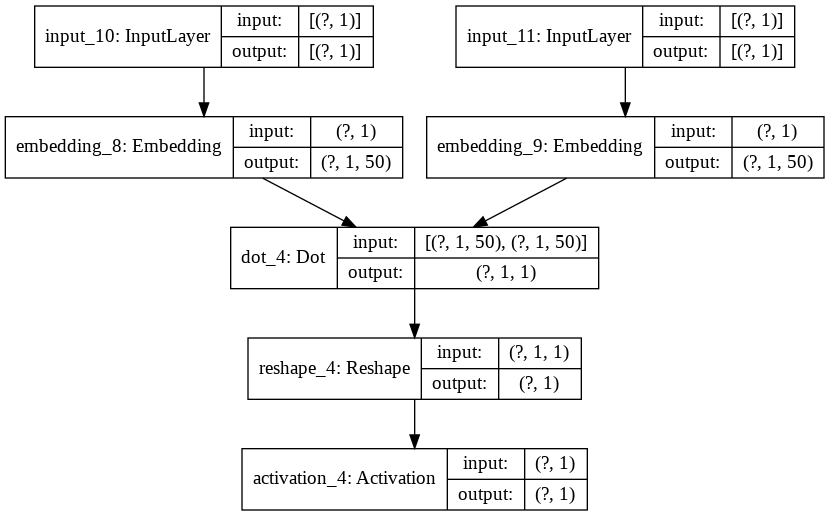

In [47]:
model =word2vec()
model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)


In [49]:
for epoch in range(1, 10):
    loss = 0
    for _, elem in enumerate(cbows):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype = 'int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype = 'int32')
        labels = np.array(elem[1],dtype = 'int32')

        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)   # 한번에 epoch에 여러번 train을 돌리는거고

    # if epoch % 100 == 99:                   # 이번엔 양이 많으니까 100다위로 해볼게
    print('epoch:', epoch, 'loss:', loss)

    # target을 가지고 context를 skipgrams
    # context로 target을 맞추는거지 cbow

    # 학습은 사실 많이 해야됩니당

epoch: 1 loss: 844.7591208517551
epoch: 2 loss: 793.7785263955593
epoch: 3 loss: 768.5324362367392
epoch: 4 loss: 752.3150029852986
epoch: 5 loss: 737.6895186454058
epoch: 6 loss: 720.6681544408202
epoch: 7 loss: 698.4523702971637
epoch: 8 loss: 670.2575013004243
epoch: 9 loss: 636.612804139033


In [53]:
import gensim   # 여기에 기존모델 옮기고

f = open('cbow.txt', 'w')
f.write('{} {}\n'.format(vocab_size -1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i,:])))))

f.close()

cbow = gensim.models.KeyedVectors.load_word2vec_format('cbow.txt', binary = False)


In [54]:
cbow.most_similar(positive = ['soldier'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sneak', 0.9440522789955139),
 ('ammunitions', 0.9438585042953491),
 ('indiscriminately', 0.9385096430778503),
 ('booby', 0.9338247179985046),
 ('retalliates', 0.9328721165657043),
 ('didnot', 0.9151878356933594),
 ('plateau', 0.9141451716423035),
 ('refugee', 0.9118841886520386),
 ('fractions', 0.9111104607582092),
 ('josephus', 0.9081465601921082)]

In [55]:
cbow.most_similar(positive = 'world')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('right', 0.938248336315155),
 ('seems', 0.9381829500198364),
 ('part', 0.9370094537734985),
 ('line', 0.9353511333465576),
 ('come', 0.9342606067657471),
 ('think', 0.9336708784103394),
 ('going', 0.9318478107452393),
 ('many', 0.9315991997718811),
 ('source', 0.93152916431427),
 ('finally', 0.9311432838439941)]